### Partie 1: inmport des packages et configuration de l'environnement

In [83]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ne pas afficher tous les petits warnings
warnings.filterwarnings("ignore")

# Options d'affichage pour mieux voir les tableaux
pd.set_option("display.max_rows", 10)       # nombre de lignes max affichées
pd.set_option("display.max_columns", 50)    # nombre de colonnes max
pd.set_option("display.width", 120)         # largeur d'affichage

# Style de base pour les graphiques
sns.set()

# Petit test pour vérifier que tout est bien importé
print("Imports OK")
print("pandas :", pd.__version__)
print("numpy  :", np.__version__)


Imports OK
pandas : 2.2.2
numpy  : 2.0.2


In [84]:
def info_func(dframe):
  # nombre de lignes et de colonnes
  n_rows = dframe.shape[0]
  n_col = dframe.shape[1]

  # Lignes de ligne dupliquées
  n_duplicated = dframe.duplicated().sum()

  # Les NaN

  nan_count = dframe.isna().sum()/dframe.shape[0]
  nan_count = nan_count.sort_values(ascending=True)

  # intitulés des colonnes

  colonnes = dframe.columns

  ### Types des colonnes

  ###types = dframe.dtypes

  # Message final
  print(f"Le jeu de données contient {n_rows} lignes, {n_col} colonnes, {n_duplicated} lignes dubliquées")
  print(f"Taux de non remplissage : \n{nan_count} valeurs vides")


def visualize_nan(df):
  plt.figure(figsize=(10, 5))
  sns.heatmap(df.isna(), cbar=False)

In [85]:
# Import du fichier depuis drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Partie 2: Affichage des datasets

In [86]:


# Chemin du fichier Data dans Drive
fichier_data = "/content/drive/MyDrive/Formation DCLIC/Edstat/EdStatsData.csv"

# Lecture du fichier
df_data = pd.read_csv(
    fichier_data,
    engine="python",
    on_bad_lines="skip"   # ignore les lignes cassées
)

print("Taille de df_data :", df_data.shape)
print("Nombre de codes pays uniques :", df_data["Country Code"].nunique())
print("Quelques codes pays :", sorted(df_data["Country Code"].dropna().unique())[:20])

df_data.head()


Taille de df_data : (886930, 70)
Nombre de codes pays uniques : 242
Quelques codes pays : ['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR']


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,...,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
info_func(df_data)

Le jeu de données contient 886930 lignes, 70 colonnes, 0 lignes dubliquées
Taux de non remplissage : 
Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.726650
                    ...   
1973              0.959924
1971              0.959933
2016              0.981442
2017              0.999839
Unnamed: 69       1.000000
Length: 70, dtype: float64 valeurs vides


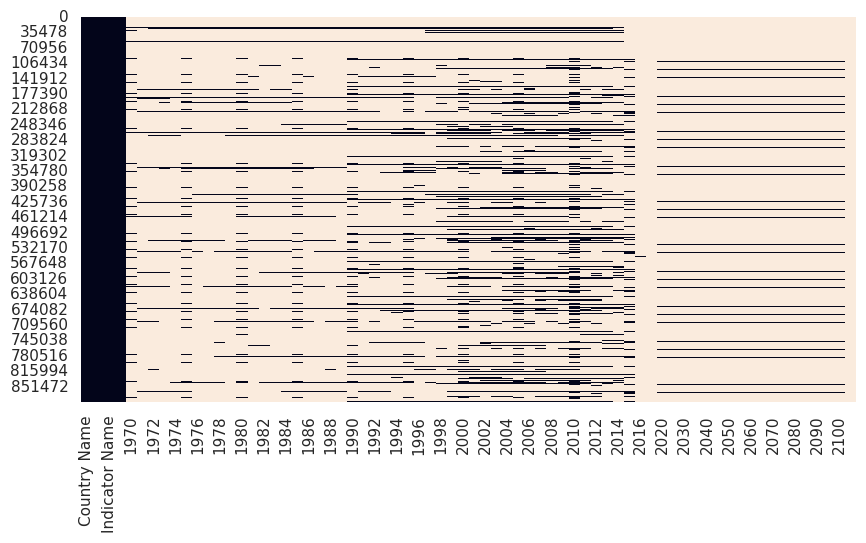

In [88]:
visualize_nan(df_data)

In [89]:
print(df_data["Country Code"].unique())
print(df_data["Country Code"].nunique())

['ARB' 'EAS' 'EAP' 'EMU' 'ECS' 'ECA' 'EUU' 'HPC' 'HIC' 'LCN' 'LAC' 'LDC'
 'LMY' 'LIC' 'LMC' 'MEA' 'MNA' 'MIC' 'NAC' 'OED' 'SAS' 'SSF' 'SSA' 'UMC'
 'WLD' 'AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS'
 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN'
 'BOL' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR'
 'CAN' 'CYM' 'CAF' 'TCD' 'CHI' 'CHL' 'CHN' 'COL' 'COM' 'COD' 'COG' 'CRI'
 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY'
 'SLV' 'GNQ' 'ERI' 'EST' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB'
 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY'
 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR'
 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'PRK' 'KOR' 'XKX' 'KWT' 'KGZ'
 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MKD' 'MDG'
 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO'
 'MNG' 'MNE' 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'N

In [90]:


# Chemin du fichier country dans Google Drive
fichier_data = "/content/drive/MyDrive/Formation DCLIC/Edstat/EdStatsCountry.csv"

# Lecture du fichier EdStatsCountry
df_country = pd.read_csv(
    fichier_data,
    engine="python",
    on_bad_lines="skip"   # ignore les lignes cassées
)

# Dimensions du DataFrame
print("Dimensions de EdStatsCountry :", df_country.shape)

# Aperçu contrôlé (3 premières lignes seulement)
df_country.head(3)


Dimensions de EdStatsCountry : (241, 32)


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


In [91]:
print(info_func(df_data))
print(info_func(df_country))

Le jeu de données contient 886930 lignes, 70 colonnes, 0 lignes dubliquées
Taux de non remplissage : 
Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.726650
                    ...   
1973              0.959924
1971              0.959933
2016              0.981442
2017              0.999839
Unnamed: 69       1.000000
Length: 70, dtype: float64 valeurs vides
None
Le jeu de données contient 241 lignes, 32 colonnes, 0 lignes dubliquées
Taux de non remplissage : 
Country Code                        0.000000
Short Name                          0.000000
Table Name                          0.000000
Long Name                           0.000000
WB-2 code                           0.004149
                                      ...   
Latest industrial data              0.556017
Other groups                        0.759336
Alternative conversion factor       0.804979
National accounts reference year    0.867220
Unname

In [92]:
#3) Merge pour ajouter la Region dans le fichier de data
df_merge = pd.merge(
    df_data,
    df_country[["Country Code", "Region"]],
    on = "Country Code",
    how = "left"
)
print("Taille de df_merge :", df_merge.shape)
df_merge.head()

Taille de df_merge : (886930, 71)


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Region
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,...,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Partie 3: Filtre Afrique subsaharienne et passage wide à long

In [93]:
# 1) garder uniquement les pays "Sub-Saharan Africa"
countries_ssa = df_country[df_country["Region"] == "Sub-Saharan Africa"].copy()
codes_ssa = countries_ssa["Country Code"].unique()
print("Nombre de pays SSA :", len(codes_ssa))

Nombre de pays SSA : 48


In [94]:
# 2) filtrer df_data sur ces codes
df_ssa_wide = df_data[df_data["Country Code"].isin(codes_ssa)].copy()
print("Taille SSA wide :", df_ssa_wide.shape)

Taille SSA wide : (175920, 70)


In [95]:
# 3) supprimer la colonne vide à la fin (Unnamed: 69)
if "Unnamed: 69" in df_ssa_wide.columns:
    df_ssa_wide = df_ssa_wide.drop(columns=["Unnamed: 69"])

In [96]:
# 4) identifier les colonnes d'années (1970, 1971, ..., 2100)
year_cols = [c for c in df_ssa_wide.columns if str(c).isdigit()]
print("Nombre de colonnes année :", len(year_cols))

Nombre de colonnes année : 65


In [97]:
# 5) passer au format long
df_ssa_long = df_ssa_wide.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Value"
)

In [98]:
# convertir Year en entier
df_ssa_long["Year"] = df_ssa_long["Year"].astype(int)
print(df_ssa_long.head())

  Country Name Country Code                                     Indicator Name  Indicator Code  Year  Value
0       Angola          AGO  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2  1970    NaN
1       Angola          AGO  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F  1970    NaN
2       Angola          AGO  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI  1970    NaN
3       Angola          AGO  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M  1970    NaN
4       Angola          AGO  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR  1970    NaN


In [99]:
print(df_ssa_long.tail())

         Country Name Country Code                                     Indicator Name        Indicator Code  Year  \
11434795     Zimbabwe          ZWE  Youth illiterate population, 15-24 years, male...      UIS.LP.AG15T24.M  2100   
11434796     Zimbabwe          ZWE  Youth literacy rate, population 15-24 years, b...     SE.ADT.1524.LT.ZS  2100   
11434797     Zimbabwe          ZWE  Youth literacy rate, population 15-24 years, f...  SE.ADT.1524.LT.FE.ZS  2100   
11434798     Zimbabwe          ZWE  Youth literacy rate, population 15-24 years, g...  SE.ADT.1524.LT.FM.ZS  2100   
11434799     Zimbabwe          ZWE  Youth literacy rate, population 15-24 years, m...  SE.ADT.1524.LT.MA.ZS  2100   

          Value  
11434795    NaN  
11434796    NaN  
11434797    NaN  
11434798    NaN  
11434799    NaN  


### Construction du panel pays–année (6 indicateurs clés)

In [100]:
# Liste explicite des 6 indicateurs Akowé (codes EdStats)
codes_akowe = [
    "SP.POP.1524.TO.UN",   # population 15-24 ans
    "SE.SEC.ENRR",         # taux brut de scolarisation secondaire
    "SE.TER.ENRR",         # taux brut de scolarisation tertiaire
    "IT.NET.USER.P2",      # utilisateurs d'Internet / 100 habitants
    "NY.GDP.PCAP.PP.KD",   # PIB/habitant PPA, prix constants 2011
    "SE.XPD.TOTL.GD.ZS"    # dépenses publiques d'éducation (% PIB)
]

In [101]:
# On garde dans df_indic_all toutes les années disponibles pour ces 6 indicateurs en SSA
df_indic_all = df_ssa_long[df_ssa_long["Indicator Code"].isin(codes_akowe)].copy()

In [102]:
print("Nb de lignes pour nos 6 indicateurs :", len(df_indic_all))
print("Années min/max dans df_indic_all :", df_indic_all["Year"].min(), df_indic_all["Year"].max())
print(df_indic_all["Indicator Code"].value_counts())


Nb de lignes pour nos 6 indicateurs : 18720
Années min/max dans df_indic_all : 1970 2100
Indicator Code
NY.GDP.PCAP.PP.KD    3120
SE.XPD.TOTL.GD.ZS    3120
SE.SEC.ENRR          3120
SE.TER.ENRR          3120
IT.NET.USER.P2       3120
SP.POP.1524.TO.UN    3120
Name: count, dtype: int64


In [114]:
# Complétude par année pour les 6 indicateurs Akowé (SSA), sur toutes les années

cover_year_akowe = (
    df_indic_all
    .groupby("Year")["Value"]
    .apply(lambda s: s.notna().mean())
    .reset_index(name="coverage")
)




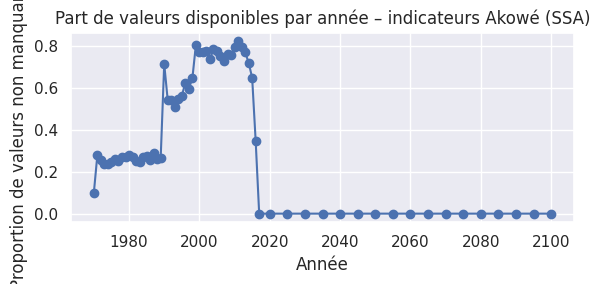

In [120]:
plt.figure(figsize=(6, 3))
plt.plot(cover_year_akowe["Year"], cover_year_akowe["coverage"], marker="o")
plt.title("Part de valeurs disponibles par année – indicateurs Akowé (SSA)")
plt.xlabel("Année")
plt.ylabel("Proportion de valeurs non manquantes")
plt.tight_layout()
plt.show()


On observe un plateau de bonne complétude entre 2000 et 2015. Pour rester dans la partie la plus récente de ce plateau tout en gardant des données fiables, nous choisissons une fenêtre de 5 ans : 2010–2015.

In [117]:
# Verifions le la couverture sur la plage annuelle 2010 à 2020
cover_year_akowe_10_20 = cover_year_akowe[
    (cover_year_akowe["Year"] >= 2010) & (cover_year_akowe["Year"] <= 2020)
].copy()

print(cover_year_akowe_10_20)

    Year  coverage
40  2010  0.795139
41  2011  0.822917
42  2012  0.798611
43  2013  0.770833
44  2014  0.722222
45  2015  0.649306
46  2016  0.347222
47  2017  0.000000
48  2020  0.000000


In [116]:
# Comparaison de la complétude : 2010-2015 vs 2016-2020

mask_10_15 = (cover_year_akowe_10_20["Year"] >= 2010) & (cover_year_akowe_10_20["Year"] <= 2015)
mask_16_20 = (cover_year_akowe_10_20["Year"] >= 2016) & (cover_year_akowe_10_20["Year"] <= 2020)

moy_10_15 = cover_year_akowe_10_20[mask_10_15]["coverage"].mean()
moy_16_20 = cover_year_akowe_10_20[mask_16_20]["coverage"].mean()

print("Moyenne couverture 2010-2015 :", moy_10_15)
print("Moyenne couverture 2016-2020 :", moy_16_20)


Moyenne couverture 2010-2015 : 0.7598379629629629
Moyenne couverture 2016-2020 : 0.11574074074074074


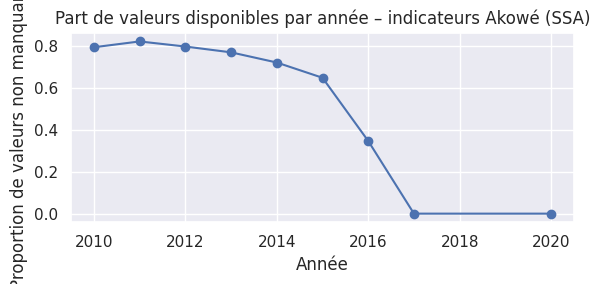

In [119]:
plt.figure(figsize=(6, 3))
plt.plot(cover_year_akowe_10_20["Year"], cover_year_akowe_10_20["coverage"], marker="o")
plt.title("Part de valeurs disponibles par année – indicateurs Akowé (SSA)")
plt.xlabel("Année")
plt.ylabel("Proportion de valeurs non manquantes")
plt.tight_layout()
plt.show()


In [123]:
# 1) On repart proprement de df_indic_all (toutes années, 6 indicateurs)

df_indic = df_indic_all.copy()


In [124]:
# 2) Ne garder que 2010-2015
df_indic = df_indic[(df_indic["Year"] >= 2010) & (df_indic["Year"] <= 2015)].copy()

print("Taille df_indic 2010-2015 :", df_indic.shape)

Taille df_indic 2010-2015 : (1728, 6)


In [125]:

# 3) Ajouter un nom de variable simple pour le pivot
df_indic["var"] = df_indic["Indicator Code"].map(code_to_var)

print(df_indic[["Country Name", "Country Code", "Year", "var", "Value"]].head())

        Country Name Country Code  Year                 var        Value
7038046       Angola          AGO  2010          GDP_PPP_pc  5895.114088
7038060       Angola          AGO  2010   Edu_spend_GDP_pct     3.476230
7038135       Angola          AGO  2010       GER_secondary    28.781309
7038139       Angola          AGO  2010        GER_tertiary          NaN
7038175       Angola          AGO  2010  Internet_users_100     2.800000


In [126]:
# pivot pour obtenir le panel pays–année
df_panel = df_indic.pivot_table(
    index=["Country Code", "Country Name", "Year"],
    columns="var",
    values="Value",
    aggfunc="mean"
).reset_index()


In [127]:
# Les noms des colonnes deviennent un Index multi-niveaux; on les "aplatit"
df_panel.columns.name = None

print("Taille panel :", df_panel.shape)
print(df_panel.head())

Taille panel : (288, 9)
  Country Code Country Name  Year  Edu_spend_GDP_pct   GDP_PPP_pc  GER_secondary  GER_tertiary  Internet_users_100  \
0          AGO       Angola  2010            3.47623  5895.114088      28.781309           NaN                 2.8   
1          AGO       Angola  2011                NaN  5911.254334      28.898720       6.94609                 3.1   
2          AGO       Angola  2012                NaN  5998.638601            NaN           NaN                 6.5   
3          AGO       Angola  2013                NaN  6185.013829            NaN       9.92357                 8.9   
4          AGO       Angola  2014                NaN  6260.132681            NaN           NaN                10.2   

   Pop_15_24  
0  3774989.0  
1  3875706.0  
2  3972550.0  
3  4067194.0  
4  4162115.0  


### Partie 4  Nettoyage  + agrégation + croissance

In [128]:
# tri par pays et année
df_panel = df_panel.sort_values(["Country Code", "Year"])

# colonnes numériques à interpoler
num_cols = [
    "Pop_15_24",
    "GER_secondary",
    "GER_tertiary",
    "Internet_users_100",
    "GDP_PPP_pc",
    "Edu_spend_GDP_pct"
]

In [129]:
# interpolation linéaire pays par pays
df_clean = df_panel.copy()

for col in num_cols:
    df_clean[col] = (
        df_clean
        .groupby("Country Code")[col]
        .transform(lambda s: s.interpolate(limit_direction="both"))
    )

print(df_clean[num_cols].isna().sum())


Pop_15_24             12
GER_secondary         48
GER_tertiary          48
Internet_users_100     6
GDP_PPP_pc             6
Edu_spend_GDP_pct     48
dtype: int64


In [130]:
# Moyenne 2010–2015 par pays (niveau pays, pas pays-année)

df_country_mean = (
    df_clean
    .groupby(["Country Code", "Country Name"])[num_cols]
    .mean()
    .reset_index()
)

print(df_country_mean.head())

  Country Code  Country Name     Pop_15_24  GER_secondary  GER_tertiary  Internet_users_100    GDP_PPP_pc  \
0          AGO        Angola  4.018651e+06      28.879151      8.529066            7.316667   6080.203587   
1          BDI       Burundi  2.046434e+06      31.481220      4.023460            1.806740    776.063244   
2          BEN         Benin  2.124746e+06      51.938069     14.189098            5.655552   1903.068110   
3          BFA  Burkina Faso  3.521778e+06      27.342652      4.435182            6.502114   1526.420238   
4          BWA      Botswana  4.355607e+05            NaN     22.176585           22.509466  14717.894134   

   Edu_spend_GDP_pct  
0           3.476230  
1           5.811462  
2           4.681107  
3           4.289498  
4                NaN  


In [131]:
# Extraire les valeurs 2010
df_2010 = df_clean[df_clean["Year"] == 2010][
    ["Country Code", "Country Name", "Internet_users_100", "GER_secondary"]
].rename(columns={
    "Internet_users_100": "Internet_2010",
    "GER_secondary": "GER_sec_2010"
})

In [132]:
# Extraire les valeurs 2015
df_2015 = df_clean[df_clean["Year"] == 2015][
    ["Country Code", "Country Name", "Internet_users_100", "GER_secondary"]
].rename(columns={
    "Internet_users_100": "Internet_2015",
    "GER_secondary": "GER_sec_2015"
})

In [133]:
# Jointure 2010–2015
df_growth = pd.merge(
    df_2010,
    df_2015,
    on=["Country Code", "Country Name"],
    how="inner"
)

In [134]:
# Croissance annuelle moyenne sur 5 ans
df_growth["Internet_growth_pa"] = (df_growth["Internet_2015"] - df_growth["Internet_2010"]) / 5.0
df_growth["GER_sec_growth_pa"]  = (df_growth["GER_sec_2015"]  - df_growth["GER_sec_2010"])  / 5.0

print(df_growth.head())

  Country Code  Country Name  Internet_2010  GER_sec_2010  Internet_2015  GER_sec_2015  Internet_growth_pa  \
0          AGO        Angola           2.80     28.781309      12.400000     28.898720            1.920000   
1          BDI       Burundi           1.00     22.824310       4.866224     42.480068            0.773245   
2          BEN         Benin           3.13     47.681499      11.254988     56.811958            1.624998   
3          BFA  Burkina Faso           2.40     21.902201      11.387646     33.666660            1.797529   
4          BWA      Botswana           6.00           NaN      37.312050           NaN            6.262410   

   GER_sec_growth_pa  
0           0.023482  
1           3.931152  
2           1.826092  
3           2.352892  
4                NaN  


In [135]:
# Fusion des niveaux + croissance + infos pays (Income Group, Region)

df_scores = pd.merge(
    df_country_mean,
    df_growth[["Country Code", "Internet_growth_pa", "GER_sec_growth_pa"]],
    on="Country Code",
    how="left"
)

In [136]:

df_scores = pd.merge(
    df_scores,
    countries_ssa[["Country Code", "Region", "Income Group"]],
    on="Country Code",
    how="left"
)

print(df_scores.head())

  Country Code  Country Name     Pop_15_24  GER_secondary  GER_tertiary  Internet_users_100    GDP_PPP_pc  \
0          AGO        Angola  4.018651e+06      28.879151      8.529066            7.316667   6080.203587   
1          BDI       Burundi  2.046434e+06      31.481220      4.023460            1.806740    776.063244   
2          BEN         Benin  2.124746e+06      51.938069     14.189098            5.655552   1903.068110   
3          BFA  Burkina Faso  3.521778e+06      27.342652      4.435182            6.502114   1526.420238   
4          BWA      Botswana  4.355607e+05            NaN     22.176585           22.509466  14717.894134   

   Edu_spend_GDP_pct  Internet_growth_pa  GER_sec_growth_pa              Region         Income Group  
0           3.476230            1.920000           0.023482  Sub-Saharan Africa  Upper middle income  
1           5.811462            0.773245           3.931152  Sub-Saharan Africa           Low income  
2           4.681107            1.62

### Partie 5  Normalisation, sous-scores, indice Akowé

In [137]:
# colonnes à normaliser (niveau + dynamique)
cols_to_norm = [
    "Pop_15_24",
    "GER_secondary",
    "GER_tertiary",
    "Internet_users_100",
    "GDP_PPP_pc",
    "Edu_spend_GDP_pct",
    "Internet_growth_pa",
    "GER_sec_growth_pa"
]

In [138]:
for col in cols_to_norm:
    col_norm = col + "_norm"
    col_min = df_scores[col].min()
    col_max = df_scores[col].max()
    df_scores[col_norm] = (df_scores[col] - col_min) / (col_max - col_min)

df_scores.head()

,Country Code,Country Name,Pop_15_24,GER_secondary,GER_tertiary,Internet_users_100,GDP_PPP_pc,Edu_spend_GDP_pct,Internet_growth_pa,GER_sec_growth_pa,Region,Income Group,Pop_15_24_norm,GER_secondary_norm,GER_tertiary_norm,Internet_users_100_norm,GDP_PPP_pc_norm,Edu_spend_GDP_pct_norm,Internet_growth_pa_norm,GER_sec_growth_pa_norm
0,AGO,Angola,4.018651e+06,28.879151,8.529066,7.316667,6080.203587,3.476230,1.920000,0.023482,Sub-Saharan Africa,Upper middle income,0.114804,0.230802,0.213298,0.137612,0.169322,0.320984,0.282452,0.200204
1,BDI,Burundi,2.046434e+06,31.481220,4.023460,1.806740,776.063244,5.811462,0.773245,3.931152,Sub-Saharan Africa,Low income,0.057947,0.261357,0.089275,0.020409,0.003149,0.646355,0.104996,0.690729
2,BEN,Benin,2.124746e+06,51.938069,14.189098,5.655552,1903.068110,4.681107,1.624998,1.826092,Sub-Saharan Africa,Low income,0.060204,0.501580,0.369098,0.102278,0.038457,0.488861,0.236802,0.426483
3,BFA,Burkina Faso,3.521778e+06,27.342652,4.435182,6.502114,1526.420238,4.289498,1.797529,2.352892,Sub-Saharan Africa,Low income,0.100480,0.212759,0.100608,0.120285,0.026657,0.434298,0.263501,0.492612
4,BWA,Botswana,4.355607e+05,NaN,22.176585,22.509466,14717.894134,NaN,6.262410,NaN,Sub-Saharan Africa,Upper middle income,0.011507,NaN,0.588965,0.460782,0.439931,NaN,0.954427,NaN


# Sous-scores

In [139]:

df_scores["Score_market"] = df_scores[
    ["Pop_15_24_norm", "GER_secondary_norm", "GER_tertiary_norm"]
].mean(axis=1)

In [140]:
df_scores["Score_dynamic"] = df_scores[
    ["Internet_growth_pa_norm", "GER_sec_growth_pa_norm"]
].mean(axis=1)

In [141]:
df_scores["Score_payment"] = df_scores[
    ["GDP_PPP_pc_norm", "Edu_spend_GDP_pct_norm"]
].mean(axis=1)

In [142]:
df_scores["Score_operational"] = df_scores[
    ["Internet_users_100_norm"]
]

Indice Akowé + classement

In [144]:
# Indice Akowé (mêmes poids que votre version)

df_scores["Indice_Akowe"] = (
    0.35 * df_scores["Score_market"] +
    0.25 * df_scores["Score_dynamic"] +
    0.25 * df_scores["Score_payment"] +
    0.15 * df_scores["Score_operational"]
)

In [145]:
# Rang (1 = meilleur)
df_scores["Rang_Akowe"] = df_scores["Indice_Akowe"].rank(
    ascending=False,
    method="min",
    na_option="bottom"
).astype(int)

In [146]:
# Top 10
top10 = df_scores.sort_values("Indice_Akowe", ascending=False).head(10)
top10[["Country Name", "Indice_Akowe", "Rang_Akowe"]]

,Country Name,Indice_Akowe,Rang_Akowe
45,South Africa,0.625216,1
27,Mauritius,0.595271,2
40,Seychelles,0.541150,3
4,Botswana,0.522789,4
11,Cabo Verde,0.493782,5
14,Gabon,0.431165,6
38,Sao Tome and Principe,0.416949,7
15,Ghana,0.412988,8
19,Equatorial Guinea,0.409755,9
31,Nigeria,0.403953,10


Visualisations

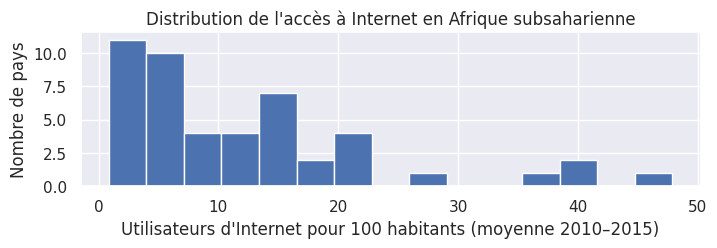

In [147]:
# Histogramme du taux moyen d'utilisateurs d'Internet

plt.figure(figsize=(8, 2))
plt.hist(df_scores["Internet_users_100"].dropna(), bins=15)
plt.xlabel("Utilisateurs d'Internet pour 100 habitants (moyenne 2010–2015)")
plt.ylabel("Nombre de pays")
plt.title("Distribution de l'accès à Internet en Afrique subsaharienne")
plt.show()

## Analyse du hist
---

Dans ce graphique, chaque barre représente un groupe de pays selon leur taux moyen d’utilisateurs d’Internet (pour 100 habitants) entre 2010 et 2015, et la hauteur de la barre indique combien de pays se trouvent dans cet intervalle. On voit que la plupart des pays d’Afrique subsaharienne se concentrent dans les niveaux très faibles : beaucoup sont en dessous de 10 utilisateurs pour 100 habitants, et la fréquence diminue rapidement quand on va vers 20, 30 puis 40. Seule une petite poignée de pays dépasse 30–40 utilisateurs pour 100 habitants. Autrement dit, la distribution est très « tassée » à gauche (faible connectivité) avec une longue « queue » vers la droite (quelques pays beaucoup plus connectés). Pour Akowé, cela signifie que le marché potentiel du numérique existe mais reste encore peu mature dans la majorité des pays, avec quelques marchés déjà avancés qui peuvent servir de points d’entrée prioritaires ou de “laboratoires” pour tester des offres plus sophistiquées.

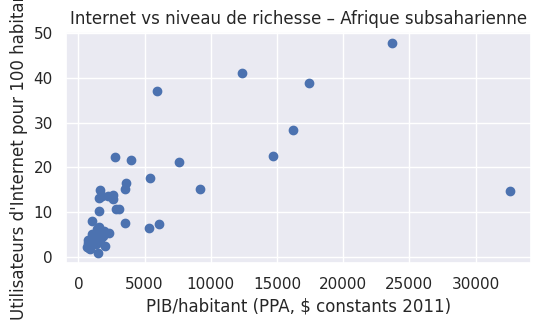

In [148]:
# Nuage de points Internet vs PIB/hab PPA

df_plot = df_scores.dropna(subset=["Internet_users_100", "GDP_PPP_pc"])

plt.figure(figsize=(6, 3))
plt.scatter(df_plot["GDP_PPP_pc"], df_plot["Internet_users_100"])
plt.xlabel("PIB/habitant (PPA, $ constants 2011)")
plt.ylabel("Utilisateurs d'Internet pour 100 habitants")
plt.title("Internet vs niveau de richesse – Afrique subsaharienne")
plt.show()


Ce nuage de points représente 46 pays d’Afrique subsaharienne. Chaque point est un pays, avec en abscisse le PIB par habitant en PPA (capacité moyenne de paiement) et en ordonnée le nombre d’utilisateurs d’Internet pour 100 habitants (niveau de connectivité). On observe une relation globalement croissante : les pays les plus riches ont en général un meilleur accès à Internet, mais cette relation est loin d’être parfaite.

La majorité des pays est concentrée dans la zone faible revenu / faible connectivité : PIB par habitant inférieur à 5 000 USD PPA et moins de 15 utilisateurs d’Internet pour 100 habitants. Quelques pays se détachent nettement en haut à droite, avec revenu plus élevé et forte connectivité : ce sont les candidats naturels pour tester des offres Akowé plus ambitieuses (contenus riches, accompagnement en ligne intensif). À l’inverse, on distingue aussi des pays riches mais relativement peu connectés, ce qui montre que le revenu ne suffit pas : sans infrastructures et usage d’Internet, la capacité à déployer une EdTech reste limitée.

Ce graphique ne prouve pas de lien de cause à effet, mais il confirme un message simple pour Akowé : la capacité de paiement crée un potentiel, et le niveau de connectivité conditionne la part de ce potentiel réellement accessible.

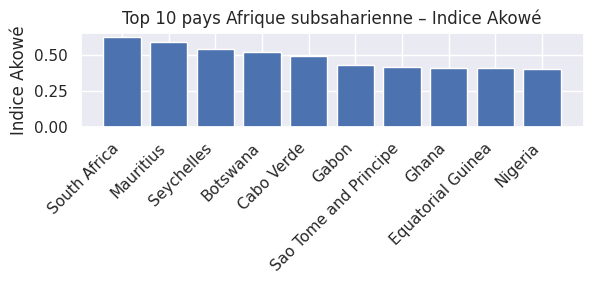

In [149]:
# Bar chart Top 10

plt.figure(figsize=(6, 3))
plt.bar(top10["Country Name"], top10["Indice_Akowe"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Indice Akowé")
plt.title("Top 10 pays Afrique subsaharienne – Indice Akowé")
plt.tight_layout()
plt.show()


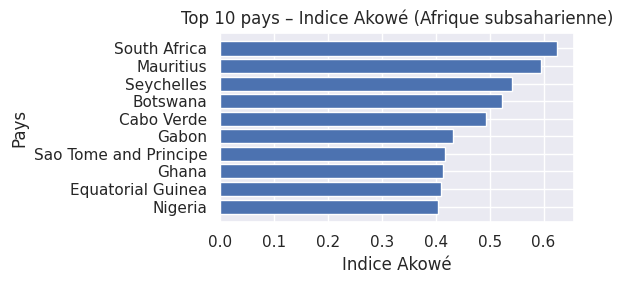

In [150]:
# 4) Barplot Top 10 – Indice Akowé

top10_sorted = top10.sort_values("Indice_Akowe", ascending=True)  # pour barres horizontales

plt.figure(figsize=(6, 3))
plt.barh(top10_sorted["Country Name"], top10_sorted["Indice_Akowe"])
plt.title("Top 10 pays – Indice Akowé (Afrique subsaharienne)")
plt.xlabel("Indice Akowé")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()


Ces deux graphique présente les dix pays d’Afrique subsaharienne qui obtiennent les meilleurs scores selon l’indice Akowé (compris entre 0 et 1). On voit clairement un petit groupe de leaders : l’Afrique du Sud, Maurice, les Seychelles et le Botswana, avec des scores proches ou supérieurs à 0,5. Cela signifie que, pour ces pays, les quatre piliers utilisés dans l’indice  taille du marché des 15–24 ans, dynamique de croissance (Internet et scolarisation), capacité de paiement (PIB/habitant PPA, dépenses d’éducation) et faisabilité opérationnelle (accès à Internet)  sont globalement au-dessus de la moyenne régionale.

Les pays suivants comme le Cabo Verde, le Ghana, le Gabon, Sao Tomé-et-Principe, la Guinée équatoriale ou le Nigeria ont un indice un peu plus faible, mais restent dans une zone intéressante : ils combinent soit un marché important, soit une bonne dynamique de croissance, soit une bonne capacité de paiement, avec encore quelques faiblesses sur un ou deux piliers. Pour Akowé, ce graphique suggère un premier cercle de pays prioritaires (en haut du classement) pour un déploiement rapide, et un deuxième cercle de pays à fort potentiel où une stratégie plus progressive ou plus partenariale serait pertinente.

In [151]:
# 5) Barres groupées 4 piliers pour le Top 5

top5 = df_scores.sort_values("Indice_Akowe", ascending=False).head(5)

cols_piliers = ["Score_market", "Score_dynamic", "Score_payment", "Score_operational"]

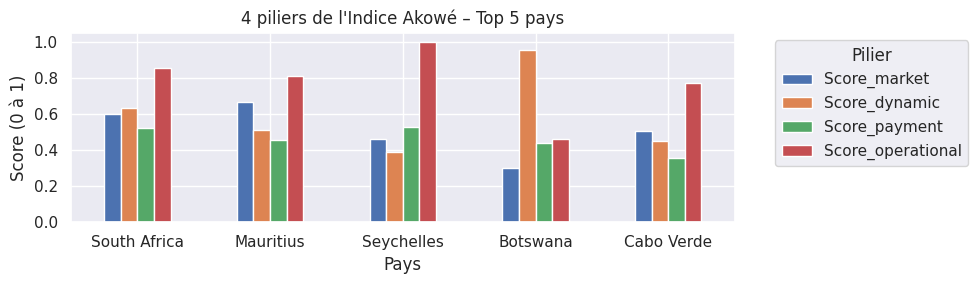

In [152]:


plot_df = top5.set_index("Country Name")[cols_piliers]

plt.figure(figsize=(10, 3))
plot_df.plot(kind="bar", ax=plt.gca())
plt.title("4 piliers de l'Indice Akowé – Top 5 pays")
plt.xlabel("Pays")
plt.ylabel("Score (0 à 1)")
plt.xticks(rotation=0)
plt.legend(title="Pilier", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Ce graphique compare les cinq pays les mieux classés selon l’indice Akowé (Afrique du Sud, Maurice, Seychelles, Botswana, Cabo Verde) sur les quatre piliers utilisés pour construire l’indicateur : taille du marché (Score_market), dynamique de croissance (Score_dynamic), capacité de paiement (Score_payment) et faisabilité opérationnelle liée au numérique (Score_operational). On voit que l’Afrique du Sud et Maurice combinent un marché de taille correcte, une bonne dynamique et surtout une faisabilité opérationnelle élevée, ce qui signifie qu’ils ont déjà une base d’utilisateurs connectés intéressante pour une EdTech comme Akowé.

Les Seychelles ont un score de marché plus faible (population 15–24 ans limitée), mais compensent par une excellente capacité de paiement et un très bon environnement numérique, ce qui explique leur place dans le Top 3 malgré la petite taille du pays. Le Botswana se distingue par une dynamique de croissance très forte, mais des fondamentaux un peu moins homogènes. Cabo Verde présente un profil plus équilibré : aucun pilier n’est extrême, mais l’ensemble est au-dessus de la moyenne, ce qui en fait un marché relativement stable et attractif pour une implantation progressive d’Akowé.

Nuage des points: Taille du marché et capacités du paiements.

In [153]:
# 6) Scatter : Score marché vs Score paiement (quadrants)

base_scatter = df_scores.dropna(subset=["Score_market", "Score_payment"]).copy()

median_market  = base_scatter["Score_market"].median()
median_payment = base_scatter["Score_payment"].median()

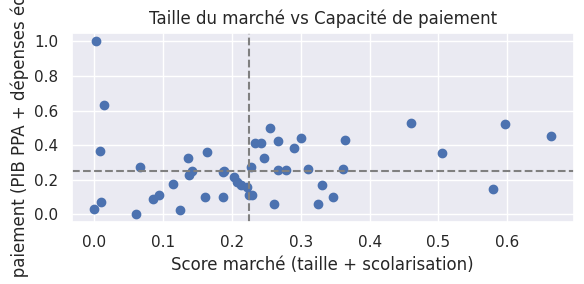

In [154]:


plt.figure(figsize=(6, 3))
plt.scatter(base_scatter["Score_market"], base_scatter["Score_payment"])

# Lignes de médiane
plt.axvline(median_market, color="grey", linestyle="--")
plt.axhline(median_payment, color="grey", linestyle="--")

plt.title("Taille du marché vs Capacité de paiement")
plt.xlabel("Score marché (taille + scolarisation)")
plt.ylabel("Score paiement (PIB PPA + dépenses éducation)")
plt.tight_layout()
plt.show()


Ce nuage de points met en relation, pour chaque pays d’Afrique subsaharienne, la taille du marché potentiel (score_market, axe horizontal) et la capacité de paiement (score_payment, axe vertical), tous deux normalisés entre 0 et 1. Les lignes pointillées représentent les médianes des deux scores (environ 0,22 pour la taille du marché et 0,25 pour la capacité de paiement) et découpent la carte en quatre zones de lecture.

La partie en haut à droite regroupe les pays qui combinent grand marché de jeunes et pouvoir d’achat relativement élevé : ce sont les cibles prioritaires pour une offre Akowé plus complète (formations payantes, services premium, accompagnement personnalisé). La zone en bas à droite correspond aux pays avec gros volume d’apprenants mais capacité de paiement plus faible : ce sont des marchés de masse, où il faudra privilégier des prix accessibles, des offres freemium ou des partenariats publics/ONG. En haut à gauche, on trouve des pays à petite taille de marché mais pouvoir d’achat plutôt bon : ces pays sont intéressants pour tester des produits, des versions pilotes ou des offres “haut de gamme”. Enfin, en bas à gauche, la plupart des pays combinent marché modeste et capacité de paiement limitée ; ce sont des marchés à surveiller dans le temps, plutôt pour des actions ciblées ou des projets subventionnés que pour un déploiement commercial immédiat.

 Heatmap de corrélation – indicateurs de base

In [155]:
cols_num = [
    "Pop_15_24",
    "GER_secondary",
    "GER_tertiary",
    "Internet_users_100",
    "GDP_PPP_pc",
    "Edu_spend_GDP_pct"
]


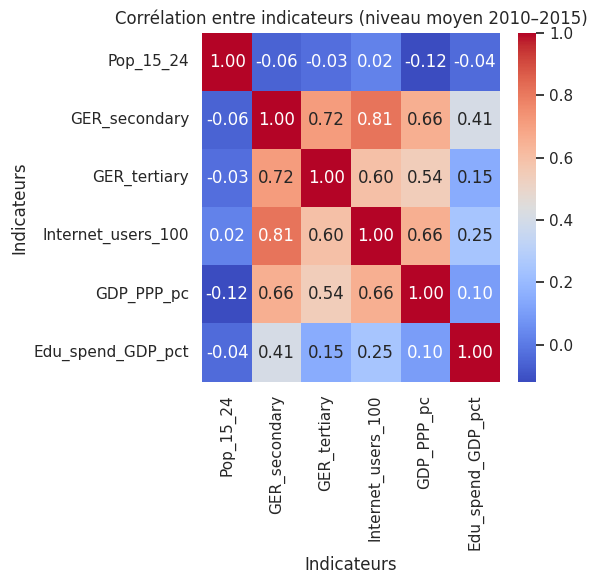

In [156]:



corr_base = df_scores[cols_num].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(corr_base, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélation entre indicateurs (niveau moyen 2010–2015)")
plt.xlabel("Indicateurs")
plt.ylabel("Indicateurs")
plt.tight_layout()
plt.show()


Les corrélations entre nos principaux indicateurs agrégés par pays : taille de la population 15–24 ans (Pop_15_24), taux brut de scolarisation secondaire et tertiaire (GER_secondary, GER_tertiary), utilisateurs d’Internet pour 100 habitants (Internet_users_100), PIB par habitant en PPA (GDP_PPP_pc) et dépenses publiques d’éducation en % du PIB (Edu_spend_GDP_pct). On observe d’abord que la taille du groupe des 15–24 ans est presque indépendante des autres variables (coefficients proches de 0), ce qui signifie qu’un “grand” pays jeune n’est pas automatiquement plus riche, plus connecté ou mieux scolarisé. En revanche, le taux de scolarisation secondaire est fortement corrélé au tertiaire (≈ 0,72), à l’accès à Internet (≈ 0,81) et au PIB par habitant (≈ 0,66) : les pays où le secondaire est développé ont en général un meilleur accès au supérieur, une meilleure connectivité et un niveau de revenu plus élevé. L’accès à Internet est lui aussi fortement lié au PIB (≈ 0,66), ce qui confirme que le numérique reste plus développé dans les pays les plus riches. Les dépenses d’éducation en % du PIB sont modérément corrélées au secondaire (≈ 0,41), mais assez peu liées aux autres variables. Ces corrélations décrivent des relations linéaires moyennes, mais ne prouvent pas de causalité ; elles sont calculées sur un échantillon limité de pays d’Afrique subsaharienne avec des valeurs manquantes, ce qui introduit une incertitude modérée dans les coefficients.
Source des données : fichiers EdStats de la Banque mondiale (EdStatsData, EdStatsCountry, EdStatsSeries) pour les pays d’Afrique subsaharienne, période 2010–2015.
Niveau de preuve : corrélations de Pearson calculées directement sur notre base agrégée pays (preuve forte sur les valeurs numériques ; interprétation économique soumise aux limites de l’échantillon et aux données manquantes).

Segmentation à partir des médianes marché / paiement

In [157]:
# On enlève les pays qui n'ont pas de score marché ou paiement
df_seg = df_scores.dropna(subset=["Score_market", "Score_payment"]).copy()


In [158]:
# Médianes
med_market = df_seg["Score_market"].median()
med_payment = df_seg["Score_payment"].median()

print(f"Médiane Score_market  : {med_market:.3f}")
print(f"Médiane Score_payment : {med_payment:.3f}")

Médiane Score_market  : 0.225
Médiane Score_payment : 0.253


In [159]:
# 1) Segment prioritaire : grand marché + bonne capacité de paiement
segment_prioritaire = (
    df_seg
    .loc[
        (df_seg["Score_market"] >= med_market) &
        (df_seg["Score_payment"] >= med_payment),
        ["Country Name", "Score_market", "Score_payment", "Indice_Akowe"]
    ]
    .sort_values("Indice_Akowe", ascending=False)
)

In [160]:
print("\nPays PRIORITAIRES Akowé (grand marché + capacité de paiement) :")
print("Nombre de pays dans ce segment :", len(segment_prioritaire))
segment_prioritaire.head(15)


Pays PRIORITAIRES Akowé (grand marché + capacité de paiement) :
Nombre de pays dans ce segment : 17


,Country Name,Score_market,Score_payment,Indice_Akowe
45,South Africa,0.597425,0.520312,0.625216
27,Mauritius,0.663851,0.455523,0.595271
40,Seychelles,0.459944,0.530409,0.541150
4,Botswana,0.300236,0.439931,0.522789
11,Cabo Verde,0.504980,0.355847,0.493782
...,...,...,...,...
20,Kenya,0.246438,0.324464,0.308723
6,Cote d'Ivoire,0.227856,0.275272,0.288539
2,Benin,0.310294,0.263659,0.272770
13,Ethiopia,0.360750,0.265260,0.271055


Segment « grand marché + bonne capacité de paiement » (17 pays)
En utilisant les médianes de nos scores “marché” et “paiement”, nous identifions 17 pays d’Afrique subsaharienne qui se situent au-dessus de la médiane sur les deux dimensions. Ces pays combinent donc :

un marché éducatif relativement large et/ou bien scolarisé ;

une capacité de paiement supérieure à la moyenne de la région (PIB/habitant PPA plus élevé et effort public en éducation plus important).

Dans ce segment, Afrique du Sud, Maurice, Seychelles, Botswana et Cabo Verde se distinguent par un Indice Akowé élevé : ils cumulent des scores solides sur les quatre piliers (marché, dynamique, paiement, opérationnel). Ce sont des candidats naturels pour une première vague de déploiement ciblant des offres premium ou des partenariats structurants.

D’autres pays comme Kenya, Côte d’Ivoire, Bénin, Éthiopie ou République du Congo se situent juste au-dessus des médianes. Ils offrent un potentiel réel, mais avec des profils plus contrastés : certains ont un marché jeune important mais une capacité de paiement limitée (ex. Éthiopie), d’autres ont une capacité de paiement plus forte mais un marché éducatif plus réduit (ex. Congo, Rep.).

Pour Akowé, cela plaide pour une stratégie différenciée :

concentrer la Vague 1 sur les pays du haut de ce segment (Afrique du Sud, Maurice, Seychelles, Botswana, Cabo Verde) ;

positionner les pays de bas de segment dans une Vague 2, avec des offres plus flexibles (freemium, contenus plus légers, partenariats locaux) et un suivi rapproché de leur évolution sur les indicateurs.